In [2]:
import cv2
import pytesseract
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
%matplotlib inline

def plot_images(img1, img2 = None, title1="", title2=""):
    fig = plt.figure(figsize=[30,30])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)
    
def printmd(string):
    display(Markdown(string))

print(cv2.__version__)


4.2.0


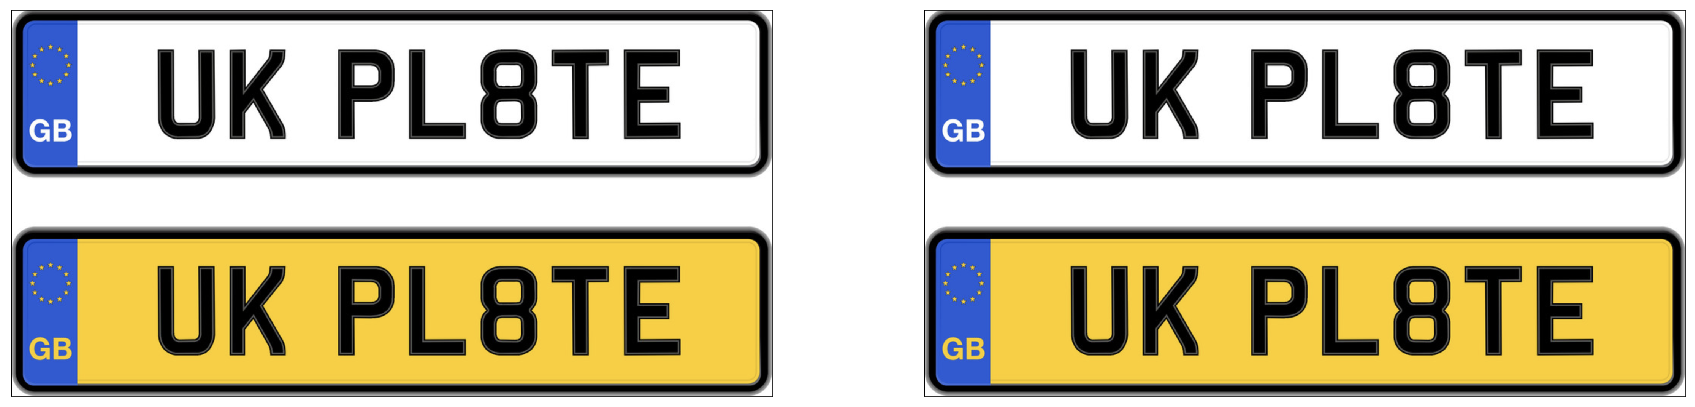

In [5]:
raw = cv2.imread("./sample-plate.png")
image = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
plot_images(image, image)

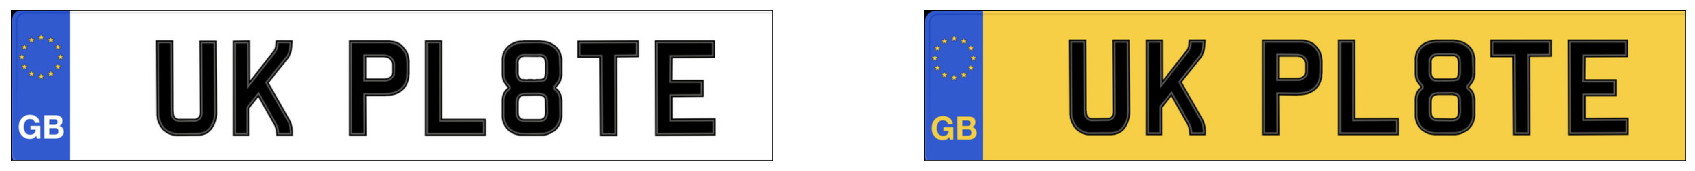

In [144]:

front = image[30:400, 30:1900]
rear = image[600:970, 30:1900]
plot_images(front, rear)

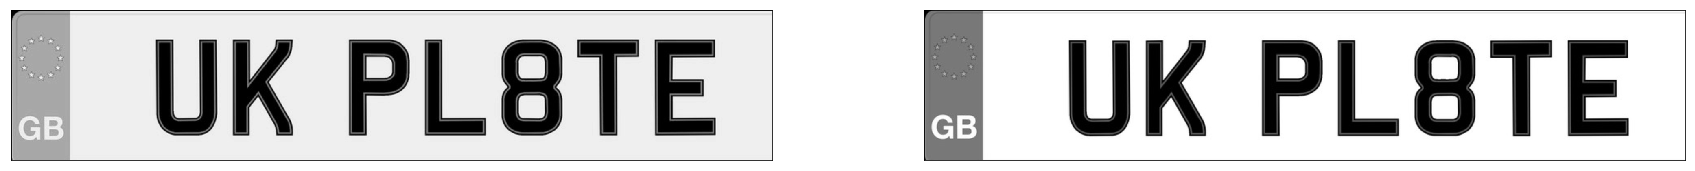

In [145]:
front_gray = cv2.cvtColor(front, cv2.COLOR_BGR2GRAY)
rear_gray = cv2.cvtColor(rear, cv2.COLOR_BGR2GRAY)
plot_images(rear_gray, front_gray)

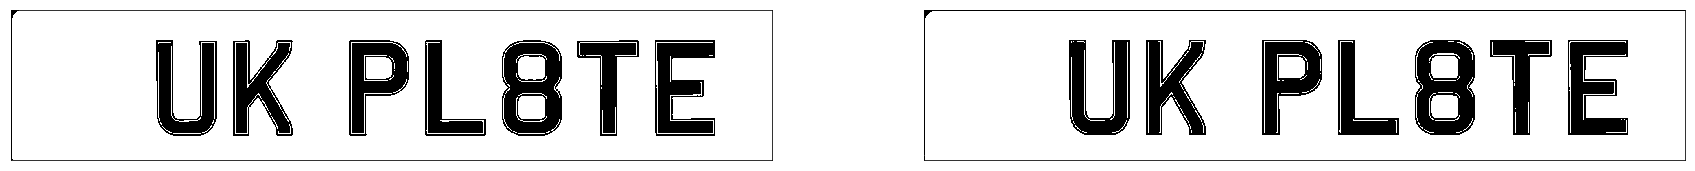

In [176]:
ret, front_mask = cv2.threshold(front_gray, 70, 255, cv2.THRESH_BINARY)
ret, rear_mask = cv2.threshold(rear_gray, 70, 255, cv2.THRESH_BINARY)

plot_images(front_mask, rear_mask)

In [136]:
text = pytesseract.image_to_string(mask_inv, config='-l eng --psm 6 -c tessedit_char_whitelist=0123456789ABCDEFGHJKLMNOPQRSTUVWXYZ')
printmd("# " + text)

# UK PL8TE
UK PL8TE